# Import Libraries

In [274]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score

sns.set_palette(palette='Set1', n_colors=5)

# Read And Analyze The Data

In [29]:
df = pd.read_csv('./data/train.csv')

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [5]:
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check For Spelling Errors

In [8]:
for c in ['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']:
    display("Uniques for '%s': %s" % (c, df.loc[:, c].unique()))

"Uniques for 'Pclass': [3 1 2]"

"Uniques for 'Sex': ['male' 'female']"

"Uniques for 'Ticket': ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'\n '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'\n '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'\n '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'\n 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'\n 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'\n '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'\n 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'\n 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'\n 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'\n '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'\n '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'\n 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'\n '364500' '374910' 'PC 17754' 'PC 17759' '231919' '

"Uniques for 'Cabin': [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'\n 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'\n 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'\n 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'\n 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'\n 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'\n 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'\n 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'\n 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'\n 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'\n 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'\n 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'\n 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'\n 'B42' 'C148']"

"Uniques for 'Embarked': ['S' 'C' 'Q' nan]"

## Prepare Data

The first step is to understand the volume of missing data.

In [23]:
missing_data_map = {
    'Column Name': [],
    'Missing Data Per Cent': []
}

for c in df.columns.values:
    col_series = df.loc[:, c]
    missing_data = col_series.isna().sum() / col_series.size
    missing_data_map['Column Name'].append(c)
    missing_data_map['Missing Data Per Cent'].append(round(missing_data * 100, 2))

display(pd.DataFrame(missing_data_map))

,Column Name,Missing Data Per Cent
0,PassengerId,0.00
1,Survived,0.00
2,Pclass,0.00
3,Name,0.00
4,Sex,0.00
5,Age,19.87
6,SibSp,0.00
7,Parch,0.00
8,Ticket,0.00
9,Fare,0.00


The above table visualizes the volume of missing data per column name.
It is evident that the `Cabin` column will yeild very little help as it most of its data is missing. As such, the values of this column will be ignored from analysis.

In the `Age` coulm roughly 20% of the data is missing. The data will be imputed in an attempt to make the results less biased. Otherwise, filling the values with `-1` or removing the columns will reduce the accuracy of the model.

For the purposes of the analysis, the `Name` and `PassengerId` columns are also redundant as they are no predictors of the data itself.

A `Ticket` is also a product of `Cabin` and `Pclass` and as such can also be excluded. Additionally, ticket numbers are unique and should be excluded as well (there is no grouping of tickets per-say).

Data imputation will be done at a later stage. First, let's understand which columns are possible predictors of the survival of a passanger.

In [287]:
df_prepared = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])
display(df_prepared)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


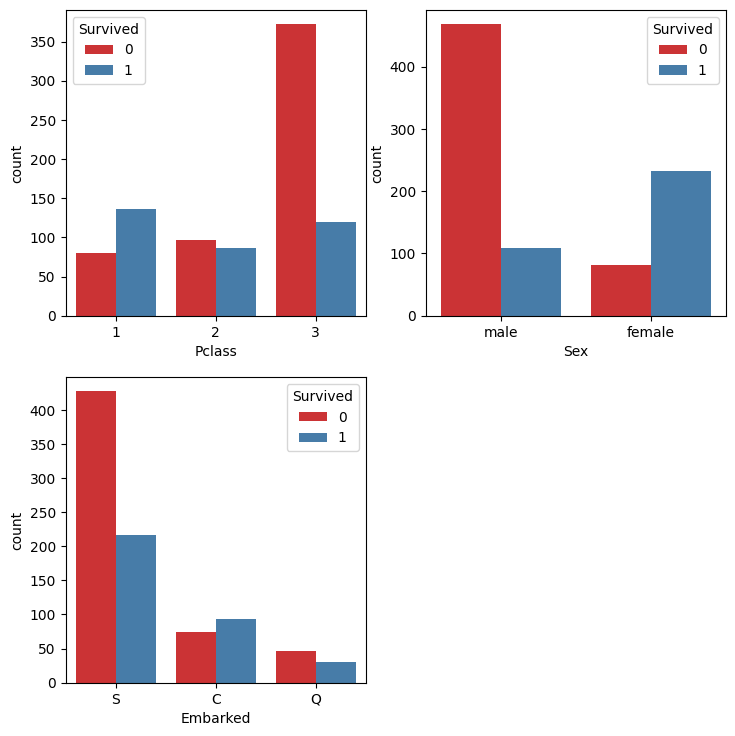

In [242]:
columns = ['Pclass', 'Sex', 'Embarked']

fig = plt.figure(figsize=(6, 4))
for i, c in enumerate(columns):
    ax = fig.add_subplot(len(columns), 2, i + 1)
    plt.subplots_adjust(bottom=-1.8, right=0.8, top=0.8, left=-0.3)
    sns.countplot(df, x=c, hue='Survived')

As can be seem, the passanger class, sex and even the location from which a passanger emabarked on the ship are predictors of survival rate.

<Axes: xlabel='Fare', ylabel='Count'>

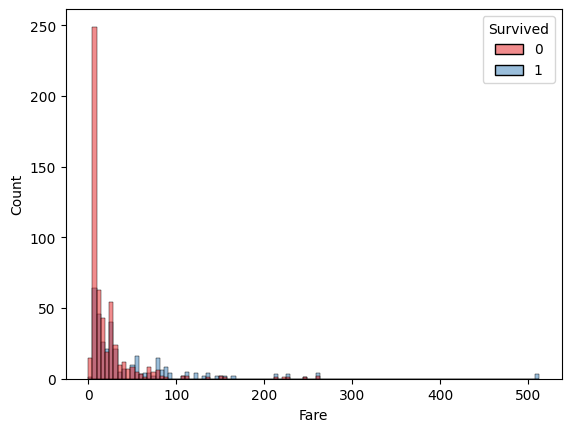

In [243]:
sns.histplot(df, x='Fare', hue='Survived')

There is also some level of connection between the fare amount and the survival rate. It is possible that more expensive cabins are related to higher rates and as such are closer to the deck.

Now let's see if age also plays a role in survival (although age needs to be correlated with `Sex` as well as historically preference was given to women and children)

<Axes: xlabel='Age', ylabel='Count'>

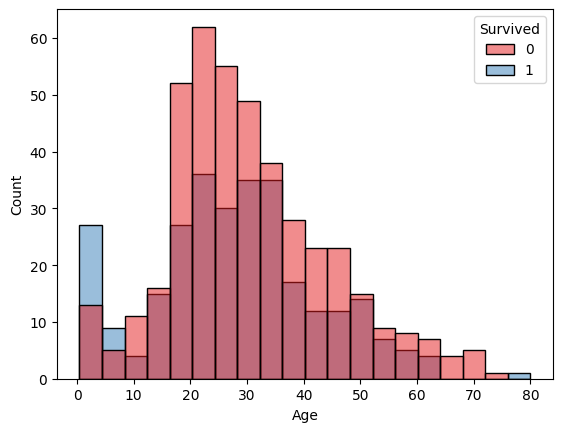

In [282]:
sns.histplot(df, x='Age', hue='Survived')

Now that we have seen how columns relate to the Survival rate, let's impute the `Age` column based on its neigboring rows.

In [288]:
imputer = KNNImputer(n_neighbors=15)
# Imputation works on rows of data. Hence, the `Age` series needs to be transformed into a matric, where all agets are rows.
age_as_rows = df_prepared['Age'].values.reshape(-1, 1)

df_imputed = imputer.fit_transform(age_as_rows)
# The imputed values need to be reshaped again into a single array
df_prepared['Age_Imputed'] = np.ceil(df_imputed.reshape(-1, 1)).astype('int')
df_prepared = df_prepared.drop(columns='Age')
display(df_prepared)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_Imputed
0,0,3,male,1,0,7.2500,S,22
1,1,1,female,1,0,71.2833,C,38
2,1,3,female,0,0,7.9250,S,26
3,1,1,female,1,0,53.1000,S,35
4,0,3,male,0,0,8.0500,S,35
...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S,27
887,1,1,female,0,0,30.0000,S,19
888,0,3,female,1,2,23.4500,S,30
889,1,1,male,0,0,30.0000,C,26


Now, the next step is to encode the data. Here, I will use a random forest classifier, which requires that data be encoded.

We will use one-hot encoding.

In [293]:
categorical_columns = ['Pclass', 'Sex', 'Embarked']

df_encoded = df_prepared.loc[:, ['Survived', 'Fare', 'SibSp', 'Parch']].copy()

for col in categorical_columns:
    encoder = OneHotEncoder(handle_unknown='error')
    pclass_encoded = encoder.fit_transform(df_prepared[[col]])
    # The results are transposed, because the original result has 891 rows with 3 elements per class.
    # However, we want to have 3 rows with all elements per class, where each row represents each class.
    pclass_encoded = pclass_encoded.transpose()

    for i, cat in enumerate(encoder.categories_[0]):
        df_encoded['%s_%s' % (col, cat)] = pclass_encoded.getrow(i).toarray()[0].astype('int')

display(df_encoded)

,Survived,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0
1,1,71.2833,1,0,1,0,0,1,0,1,0,0,0
2,1,7.9250,0,0,0,0,1,1,0,0,0,1,0
3,1,53.1000,1,0,1,0,0,1,0,0,0,1,0
4,0,8.0500,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,0,0,0,1,0,0,1,0,0,1,0
887,1,30.0000,0,0,1,0,0,1,0,0,0,1,0
888,0,23.4500,1,2,0,0,1,1,0,0,0,1,0
889,1,30.0000,0,0,1,0,0,0,1,1,0,0,0


In [297]:
def classify(data):
    classifier = RandomForestClassifier(n_estimators=100)
    kf = KFold(n_splits=10, random_state=100, shuffle=True)
    roc_data_arr = []
    auc_score_arr = []

    for (train, test) in kf.split(data):
        X_train = data.iloc[train].drop(columns='Survived')
        y_train = data.loc[train, 'Survived']

        X_test = data.iloc[test].drop(columns='Survived')
        y_test = data.loc[test, 'Survived']

        classifier.fit(X_train, y_train)
        prob = classifier.predict_proba(X_test).transpose()

        fpr, tpr, _ = roc_curve(y_true=y_test, y_score=prob[1])
        roc_data_arr.append((fpr, tpr))

        auc_score = round(roc_auc_score(y_test, prob[1]), 2)
        auc_score_arr.append(auc_score)

    return (roc_data_arr, auc_score_arr)

In [291]:
def plot_roc(roc_data_arr, auc_score_arr):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot()
    for i, (fpr, tpr) in enumerate(roc_data_arr):
        roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
        sns.lineplot(roc_df, x='fpr', y='tpr', ax=ax, label=('Fold %d: %.2f' % (i, auc_score_arr[i])), legend='full')

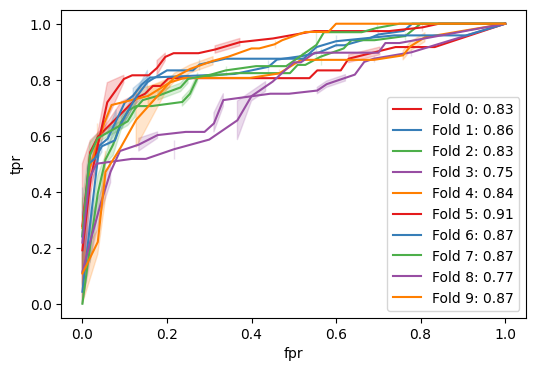

In [298]:
roc_data_arr, auc_score_arr = classify(df_encoded)
plot_roc(roc_data_arr, auc_score_arr)

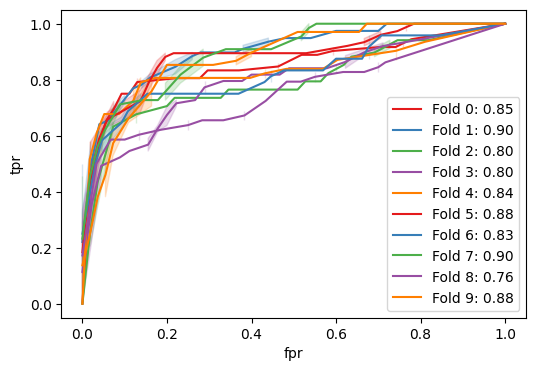

In [299]:
# Now let's drop the family-related columns, as I suspect that they add noise to the classification

df_encoded_2 = df_encoded.drop(columns=['SibSp', 'Parch'])
roc_data_arr_2, auc_score_arr_2 = classify(df_encoded_2)
plot_roc(roc_data_arr_2, auc_score_arr_2)

After removing the family-related columns, the accuracy of the model has improved.